# <span style="color:darkblue"> Lecture 22 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 20), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 21

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 20), and sort dataset

In [3]:
financial = pd.read_csv('data_raw/financial.csv')

financial

,Unnamed: 0,date_str,sp500,djia,date_ex1,date_ex2,date_ex3
0,0,2018-04-04,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04","Apr-04, 18"
1,1,2018-04-05,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05","Apr-05, 18"
2,2,2018-04-06,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06","Apr-06, 18"
3,3,2018-04-09,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09","Apr-09, 18"
4,4,2018-04-10,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10","Apr-10, 18"
...,...,...,...,...,...,...,...
1300,1300,2023-03-29,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29","Mar-29, 23"
1301,1301,2023-03-30,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30","Mar-30, 23"
1302,1302,2023-03-31,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31","Mar-31, 23"
1303,1303,2023-04-03,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03","Apr-03, 23"


In [4]:
financial["date"]= pd.to_datetime(financial['date_str'])

In [7]:
financial['date3_dt']=pd.to_datetime(financial['date_ex3'],
                                     format = "%b-%d, %y")

financial['date3_dt']

0      2018-04-04
1      2018-04-05
2      2018-04-06
3      2018-04-09
4      2018-04-10
          ...    
1300   2023-03-29
1301   2023-03-30
1302   2023-03-31
1303   2023-04-03
1304   2023-04-04
Name: date3_dt, Length: 1305, dtype: datetime64[ns]

In [10]:
financial = financial.sort_values('date',ascending = True)

financial

,Unnamed: 0,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,date3_dt
0,0,2018-04-04,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04","Apr-04, 18",2018-04-04,2018-04-04
1,1,2018-04-05,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05","Apr-05, 18",2018-04-05,2018-04-05
2,2,2018-04-06,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06","Apr-06, 18",2018-04-06,2018-04-06
3,3,2018-04-09,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09","Apr-09, 18",2018-04-09,2018-04-09
4,4,2018-04-10,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10","Apr-10, 18",2018-04-10,2018-04-10
...,...,...,...,...,...,...,...,...,...
1300,1300,2023-03-29,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29","Mar-29, 23",2023-03-29,2023-03-29
1301,1301,2023-03-30,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30","Mar-30, 23",2023-03-30,2023-03-30
1302,1302,2023-03-31,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31","Mar-31, 23",2023-03-31,2023-03-31
1303,1303,2023-04-03,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03","Apr-03, 23",2023-04-03,2023-04-03


<font size = "5">

(b) Line plots from multiple columns with a legend

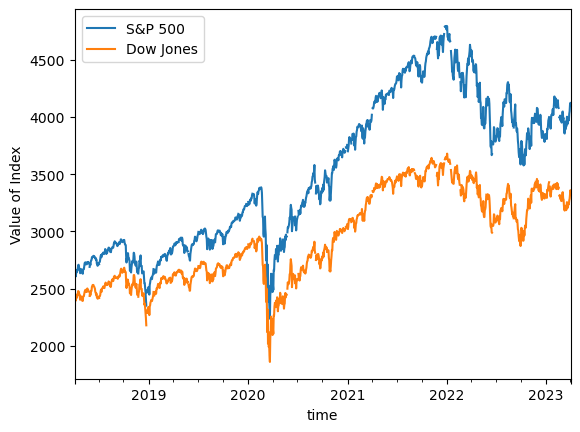

In [11]:
financial['djia_rescale']=financial['djia']/10

financial[['date','sp500','djia_rescale']].set_index('date').plot()
plt.xlabel('time')
plt.ylabel('Value of Index')
plt.legend(['S&P 500','Dow Jones'])

<font size = "5">

(c) Compute growth rates for a time series

In [18]:
financial['count_days']=((financial['date']-financial['date'].shift(1))
                         .dt.days)

financial

,Unnamed: 0,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,date3_dt,djia_rescale,sp500_growth,count_days
0,0,2018-04-04,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04","Apr-04, 18",2018-04-04,2018-04-04,2426.430,NaN,NaN
1,1,2018-04-05,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05","Apr-05, 18",2018-04-05,2018-04-05,2450.522,0.686281,1.0
2,2,2018-04-06,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06","Apr-06, 18",2018-04-06,2018-04-06,2393.276,-2.192021,1.0
3,3,2018-04-09,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09","Apr-09, 18",2018-04-09,2018-04-09,2397.910,0.333657,3.0
4,4,2018-04-10,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10","Apr-10, 18",2018-04-10,2018-04-10,2440.800,1.672687,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1300,2023-03-29,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29","Mar-29, 23",2023-03-29,2023-03-29,3271.760,1.423726,1.0
1301,1301,2023-03-30,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30","Mar-30, 23",2023-03-30,2023-03-30,3285.903,0.571526,1.0
1302,1302,2023-03-31,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31","Mar-31, 23",2023-03-31,2023-03-31,3327.415,1.443655,1.0
1303,1303,2023-04-03,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03","Apr-03, 23",2023-04-03,2023-04-03,3360.115,0.369892,3.0


Text(0.5, 1.0, 'change in SP 500 Index')

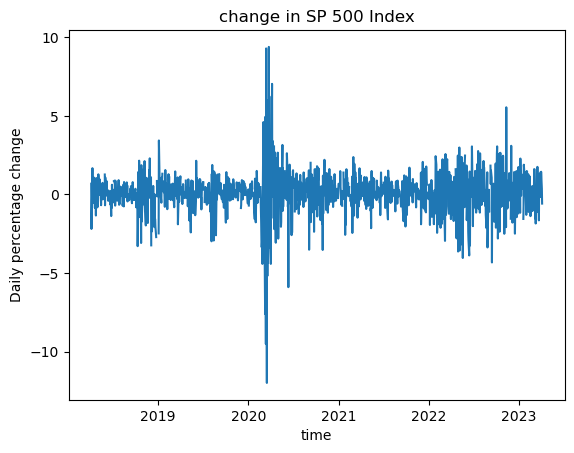

In [19]:
financial['sp500_growth']=(financial['sp500'].diff()/
                           financial['sp500'].shift(1))*100

plt.plot('date','sp500_growth',
         data=financial)
plt.xlabel('time')
plt.ylabel("Daily percentage change")
plt.title("change in SP 500 Index")



<font size = "5">

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 21

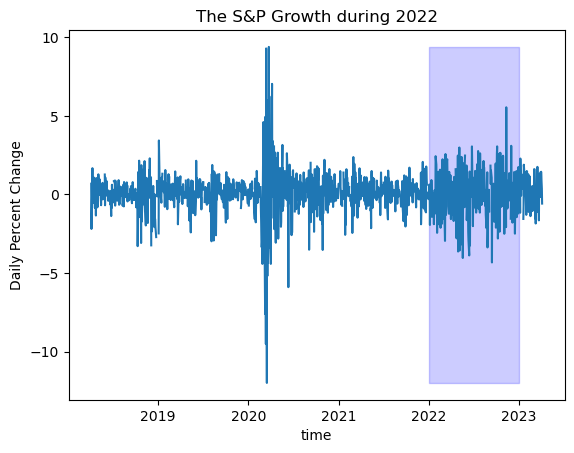

In [23]:
financial['subset_2022'] = financial['date'].between('2022-01-01','2022-12-31')

plt.plot('date','sp500_growth',data=financial)
plt.xlabel('time')
plt.ylabel('Daily Percent Change')
plt.title('The S&P Growth during 2022')

vec_y=financial['sp500_growth']
plt.fill_between(x=financial['date'],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial['subset_2022'],
                 alpha = 0.2, color= 'blue')

plt.show()

<font size = "5">

(e) Compute aggregate dataset by time period

In [29]:
year_config = pd.Grouper(key='date',freq='y')

yearly_data = (financial
              .groupby(year_config)
              .agg(sp500 = ('sp500','mean'))
              .reset_index())

yearly_data

,date,sp500
0,2018-12-31,2751.921862
1,2019-12-31,2913.360556
2,2020-12-31,3217.856482
3,2021-12-31,4273.406627
4,2022-12-31,4098.514741
5,2023-12-31,4003.579844


<font size = "5">

(f) Convert a dataset to long format

In [30]:
financial_long = pd.melt(financial,
                         var_name = 'Type',
                         value_name = 'Value',
                         id_vars='date',
                         value_vars = ['sp500','djia'])

financial_long

,date,Type,Value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15
